In [149]:
import pandas as pd

Let's talk about feature importance and model interpretability.


In [150]:
data = pd.read_csv("Processed_S&P.csv")
data.shape

(1774, 71)

For this demo I have downloaded the CNNpred dataset from this location: https://archive.ics.uci.edu/dataset/554/cnnpred+cnn+based+stock+market+prediction+using+a+diverse+set+of+variables  
I've preprocessed and cleaned it, removing price and volume columns, as well as columns with a lot of missing values. I've also created a `target` column for a classification task: the direction of next-day returns of the S&P500 index.  
The resulting dataset has around 70 feature columns and 1,800 rows which is not a lot, so I wouldn't expect a meaningful, generalizeable prediction model but as always, this is just for illustrative purposes and our main goal is to demonstrate the concepts of feature importance feature selection and model interpretability.

In [151]:
data.head()

,Date,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,DJI,IXIC,RUT,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU,target
0,2010-10-15,0.002027,-0.003641,0.007121,0.003819,0.947510,2.612887,2.395805,4.495418,1165.310522,1152.371704,1128.700149,1120.416597,0.14,0.14,0.17,1.20,2.59,-0.017894,-0.004187,4.81,5.85,0.041117,0.058574,-0.050117,-0.002667,-0.040547,0.012287,-0.046116,-0.001685,-0.002865,0.013710,-0.002171,-0.003444,2.45,2.45,2.42,0.00,0.03,1.04,3.26,5.68,5.71,5.71,0.000000,-0.026316,0.016949,-0.37,-2.46,0.26,0.66,-1.74,0.35,-0.25,-0.72,-0.61,-0.41,1.60,-3.34,-0.52,0.01,-1.72,-0.58,0.13,0.35,0.51,0.51,-0.30,-1.30,-0.88,1
1,2010-10-18,0.007244,0.002027,-0.003641,0.007121,1.663922,4.193375,3.725391,3.675473,1168.837693,1155.451538,1130.896612,1121.056332,0.14,0.15,0.18,1.14,2.52,0.022529,-0.000183,4.74,5.78,0.010358,-0.006560,-0.003067,0.004562,0.028264,0.010963,0.054707,0.016720,0.007314,0.004816,0.009912,0.006715,2.38,2.37,2.34,0.01,0.04,1.04,3.26,5.60,5.63,5.64,0.058824,0.027027,-0.050000,-0.09,2.33,-0.30,0.42,2.25,0.55,0.19,-0.22,0.85,0.01,-0.02,-2.94,-0.32,0.17,0.92,0.61,0.28,0.07,-0.17,-0.14,-2.05,0.25,0.05,1
2,2010-10-19,-0.015877,0.007244,0.002027,-0.003641,-0.330834,0.443681,1.585787,2.291670,1168.303571,1156.446632,1132.269295,1121.502538,0.14,0.14,0.18,1.11,2.50,-0.042018,-0.020662,4.70,5.75,-0.026761,-0.029897,-0.011077,-0.008926,-0.013351,-0.027885,-0.012867,-0.017501,-0.014813,-0.017620,-0.022503,-0.019475,2.36,2.36,2.32,0.00,0.04,1.05,3.25,5.57,5.61,5.61,0.000000,-0.026316,-0.026316,-2.09,-3.88,-0.73,-2.47,-4.32,-0.44,-0.92,-1.53,-0.72,-2.63,-1.29,2.39,0.42,-1.84,-2.59,-1.74,-1.23,1.27,1.66,1.62,-2.58,-4.14,-2.51,0
3,2010-10-20,0.010524,-0.015877,0.007244,0.002027,0.005948,1.569012,2.921219,3.869416,1170.097476,1158.515529,1134.069324,1122.066394,0.14,0.14,0.17,1.11,2.51,0.029659,0.000000,4.69,5.74,0.003360,0.000000,-0.001245,0.004898,0.010878,0.008366,0.042770,0.013667,0.011782,0.008388,0.011467,0.013492,2.37,2.37,2.34,0.00,0.03,1.05,3.23,5.57,5.60,5.60,-0.055556,-0.054054,0.000000,1.83,3.08,0.58,0.88,2.87,0.61,1.10,1.69,0.39,0.61,0.79,0.74,-1.57,1.40,1.03,0.91,0.94,-1.01,-1.29,-1.29,2.52,2.44,0.82,1
4,2010-10-21,0.001774,0.010524,-0.015877,0.007244,0.549488,1.916995,3.422718,4.927861,1171.945209,1160.586432,1135.880724,1122.645435,0.13,0.13,0.18,1.15,2.57,-0.023191,0.003361,4.71,5.77,-0.003252,0.039705,0.003115,0.006132,-0.010499,0.004346,0.016797,0.004696,0.003475,0.000928,-0.005683,-0.001082,2.44,2.44,2.39,0.00,0.05,1.06,3.20,5.59,5.64,5.64,0.058824,0.057143,0.036036,-0.89,-2.12,1.31,-0.32,-1.48,1.16,0.18,-0.34,0.60,-1.38,-0.18,-4.83,-0.11,-0.98,-3.69,-0.53,0.09,0.64,0.28,0.32,-3.09,-3.26,-1.55,1


The distribution of the target class if roughly half and half...


In [152]:
data["target"].value_counts() / len(data) * 100

target
1    54.396843
0    45.603157
Name: count, dtype: float64

And by the way the features here are a number of technical indicators like momentum indicatorsand exponential moving averages and whatnot plus data on a number of major major stocks in the index as well as bond yields and commodity futures and so on.  

Right off the bat, we could take a look at the Pearson correlation matrix of our features and try to eliminate features that are almost perfectly correlated in order to eliminate multicolinearity to eliminate multicolinearity. But I'm actually going to be using a random forest classifier and tree based models aren't really sensitive to multicolinearity. Although eliminating redundancies would probably help with the efficiency of model training. But we have a fairly small dataset here so that's not going to be an issue.  

Having said that let's plug the correlation heat map because that can give us some preliminary intuitions.

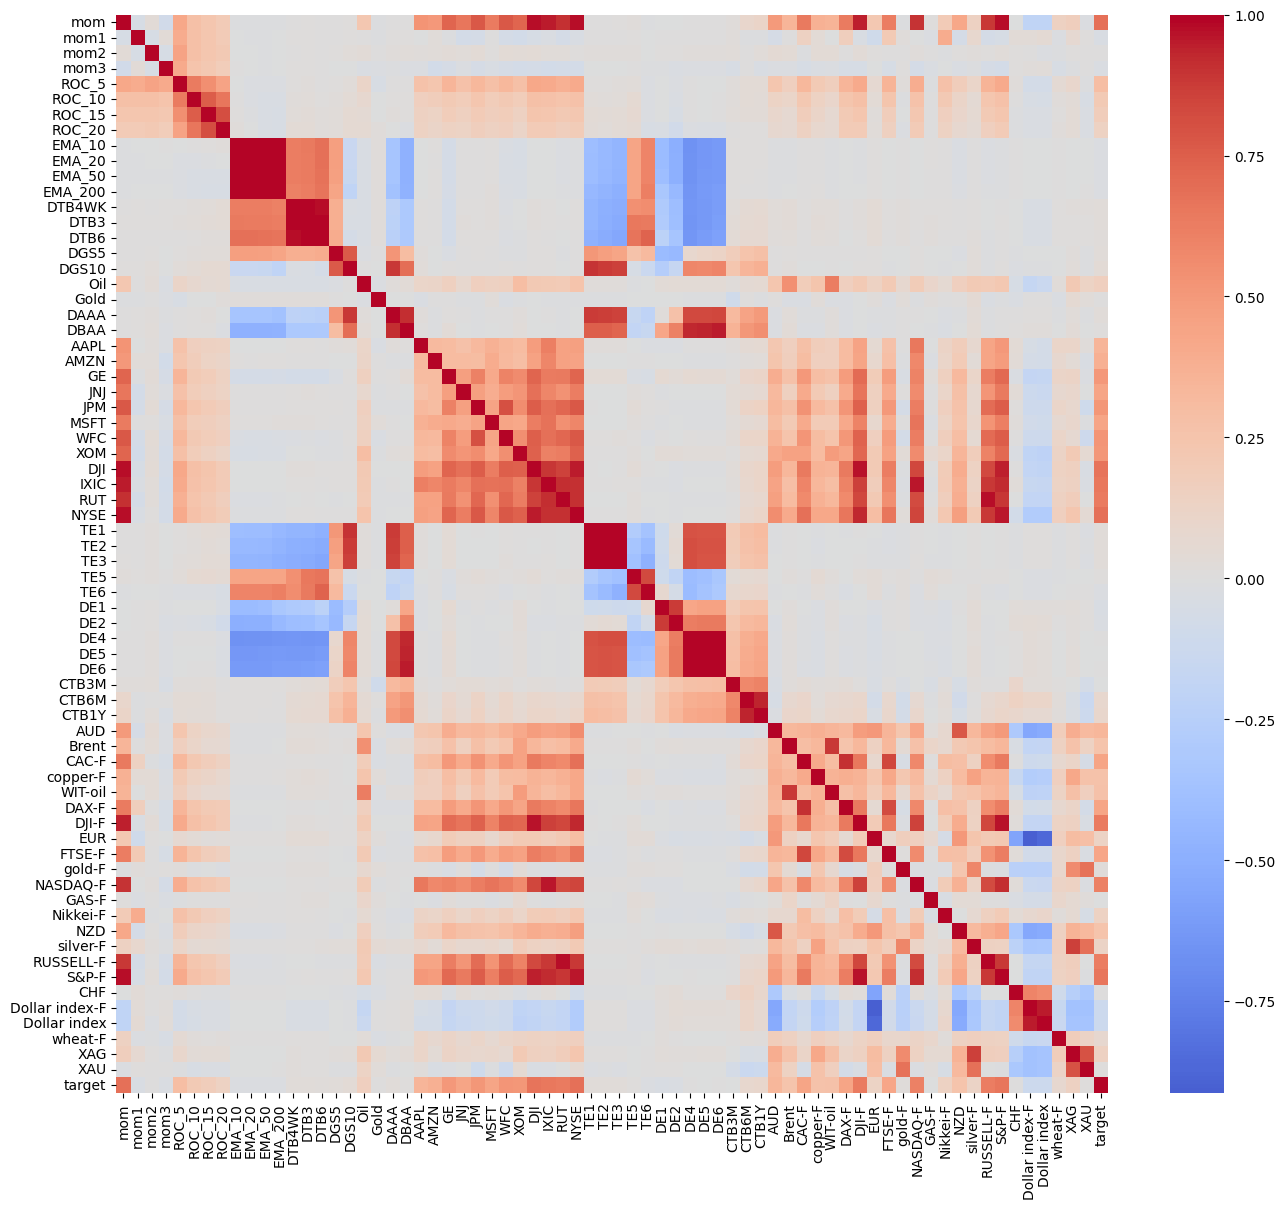

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 14))
sns.heatmap(data.drop(columns="Date").corr(), annot=False, cmap="coolwarm", center=0)
plt.show();

In particular I like to take a look at the correlation between the target variable and features. You want to see some correlation between at least some of the features and the target and we would expect the models performance to be driven mainly by those features.  

Next, let's perform the split. Again here we would have scaled the features if we were using a non-tree-based model.

In [154]:
X = data.drop(columns=["Date", "target"])
y = data["target"]

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1241, 69), (533, 69), (1241,), (533,))

In [156]:
# # Scale the features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

Let's train a random course classifier with these hyperparameters and plot the learning curves.

In [157]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=52)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=52)

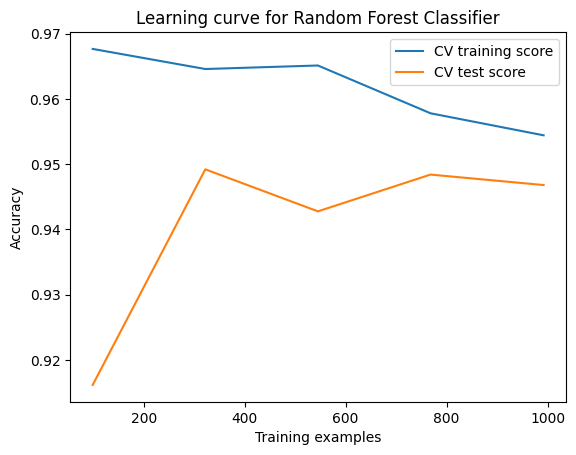

In [158]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np


def plot_learning_curve(model, X, y, cv=5, n_jobs=-1):
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        verbose=0,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label="CV training score")
    plt.plot(train_sizes, test_scores_mean, label="CV test score")
    plt.title("Learning curve for Random Forest Classifier")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()


plot_learning_curve(model, X_train, y_train)

That looks good. Here are our CV and evaluation scores. 

In [159]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1).mean()

np.float64(0.9468130586863583)

In [160]:
y_pred = model.predict(X_test)
acc_test = (y_pred == y_test).mean()
acc_test

np.float64(0.9343339587242027)

All right so we'd like to know which features are driving the performance of the model and one way to find out is by looking at permutation importance. Importance is a generic method so it can be applied to any model type. Allow me to demonstrate how we use it.

In [166]:
from sklearn.inspection import permutation_importance

perm_imp_results = permutation_importance(model, X_test, y_test, n_repeats=10, n_jobs=-1, random_state=52)
perm_importances = perm_imp_results.importances_mean
indices = (-perm_importances).argsort()
for i in range(X.shape[1]):
    print(f"{X.columns[indices[i]]}: {perm_importances[indices[i]]:.4f}")

S&P-F: 0.0544
mom: 0.0343
DJI: 0.0191
IXIC: 0.0079
XOM: 0.0053
AAPL: 0.0023
RUT: 0.0013
mom2: 0.0000
EMA_10: 0.0000
EMA_20: 0.0000
EMA_50: 0.0000
mom3: 0.0000
ROC_5: 0.0000
ROC_10: 0.0000
ROC_15: 0.0000
mom1: 0.0000
DGS5: 0.0000
DTB6: 0.0000
DTB3: 0.0000
DTB4WK: 0.0000
EMA_200: 0.0000
DGS10: 0.0000
Gold: 0.0000
Oil: 0.0000
MSFT: 0.0000
AMZN: 0.0000
DBAA: 0.0000
DAAA: 0.0000
JNJ: 0.0000
WFC: 0.0000
NYSE: 0.0000
ROC_20: 0.0000
Brent: 0.0000
copper-F: 0.0000
TE2: 0.0000
TE1: 0.0000
TE5: 0.0000
TE6: 0.0000
DE1: 0.0000
TE3: 0.0000
DE4: 0.0000
DE5: 0.0000
DE6: 0.0000
CTB3M: 0.0000
CTB6M: 0.0000
CTB1Y: 0.0000
AUD: 0.0000
DE2: 0.0000
RUSSELL-F: 0.0000
silver-F: 0.0000
EUR: 0.0000
WIT-oil: 0.0000
FTSE-F: 0.0000
gold-F: 0.0000
GAS-F: 0.0000
DJI-F: 0.0000
CHF: 0.0000
Nikkei-F: 0.0000
NZD: 0.0000
XAU: 0.0000
XAG: 0.0000
wheat-F: 0.0000
Dollar index: 0.0000
Dollar index-F: 0.0000
NASDAQ-F: -0.0021
GE: -0.0036
DAX-F: -0.0043
JPM: -0.0051
CAC-F: -0.0058


What we should have done is look at the absolute value of the permutation important score because we don't care in which direction they contribute to the model's performance, but rather to what extent they do. So I should have actually done... this... instead... (Talk some more)

Now since we've used a tree-based model, it actually has its own version of feature importance which is based on the concept of reduction in impurity so these values are always positive. We get them directly from the trained model.

In [162]:
importances = model.feature_importances_
indices = (-importances).argsort()
for i in range(X.shape[1]):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]:.4f}")

S&P-F: 0.2477
JPM: 0.1104
mom: 0.0999
XOM: 0.0926
RUT: 0.0844
DJI: 0.0745
DAX-F: 0.0739
IXIC: 0.0728
CAC-F: 0.0657
NASDAQ-F: 0.0417
GE: 0.0289
AAPL: 0.0075
EMA_10: 0.0000
mom1: 0.0000
mom2: 0.0000
mom3: 0.0000
DGS5: 0.0000
DTB6: 0.0000
DTB3: 0.0000
DTB4WK: 0.0000
EMA_200: 0.0000
EMA_50: 0.0000
EMA_20: 0.0000
DGS10: 0.0000
AMZN: 0.0000
DBAA: 0.0000
Gold: 0.0000
DAAA: 0.0000
ROC_5: 0.0000
ROC_10: 0.0000
ROC_15: 0.0000
ROC_20: 0.0000
MSFT: 0.0000
JNJ: 0.0000
WFC: 0.0000
Oil: 0.0000
NYSE: 0.0000
TE1: 0.0000
TE2: 0.0000
TE3: 0.0000
DE4: 0.0000
DE5: 0.0000
DE6: 0.0000
CTB3M: 0.0000
TE5: 0.0000
TE6: 0.0000
DE1: 0.0000
DE2: 0.0000
Brent: 0.0000
AUD: 0.0000
CTB1Y: 0.0000
CTB6M: 0.0000
DJI-F: 0.0000
EUR: 0.0000
copper-F: 0.0000
WIT-oil: 0.0000
gold-F: 0.0000
FTSE-F: 0.0000
Nikkei-F: 0.0000
GAS-F: 0.0000
NZD: 0.0000
silver-F: 0.0000
RUSSELL-F: 0.0000
CHF: 0.0000
Dollar index-F: 0.0000
Dollar index: 0.0000
wheat-F: 0.0000
XAG: 0.0000
XAU: 0.0000


Now that we know which features are likely driving the performance of the model We can go back and reduce the feature set only retaining the top N important features. Or we can use techniques like recursive feature elimination. There's a lot of research and techniques and I hope you'll take a moment to study the scikit-learn User Guide on feature selection and look into the `sklearn.feature_selection` module for more.  

But let's go back and think about whether or not it makes sense that *these* features are the primary drivers are performance. First, it helps to visualize these scores. (Refer back to the correlation matrix and talk some more.)

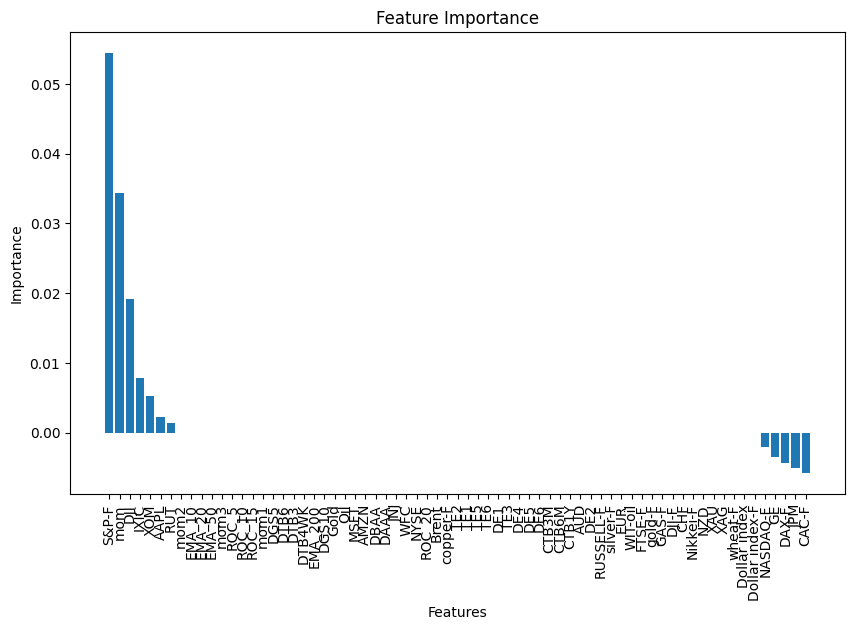

In [167]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), perm_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()